# Data Extraction, Transformation, Loading

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelEncoder


# 
# 
sns.set(style="white")

In [2]:
df : pd.DataFrame = pd.read_csv("./bank/bank.csv", encoding="utf-8", engine="python", sep=";") # load data from file
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Feature Selection

In [5]:
df.drop( columns=['duration','pdays','housing','loan'], inplace=True)

In [6]:
df.head(3)

,age,job,marital,education,default,balance,contact,day,month,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,cellular,19,oct,1,0,unknown,no
1,33,services,married,secondary,no,4789,cellular,11,may,1,4,failure,no
2,35,management,single,tertiary,no,1350,cellular,16,apr,1,1,failure,no


## Rename columns

In [7]:
df.rename(columns={'default':'has_credit', 'balance':'avg_year_balance', 'housing':'house_loan', 'contact':'contact_type', 'duration':'last_contact_in_sec', 'campaign':'num_compaign_contact', 'pdays':'num_days_last_contact', 'previous':'num_prev_contact', 'poutcome':'prev_compaign_outcome', 'y':'target'}, inplace=True)
df.head()

,age,job,marital,education,has_credit,avg_year_balance,contact_type,day,month,num_compaign_contact,num_prev_contact,prev_compaign_outcome,target
0,30,unemployed,married,primary,no,1787,cellular,19,oct,1,0,unknown,no
1,33,services,married,secondary,no,4789,cellular,11,may,1,4,failure,no
2,35,management,single,tertiary,no,1350,cellular,16,apr,1,1,failure,no
3,30,management,married,tertiary,no,1476,unknown,3,jun,4,0,unknown,no
4,59,blue-collar,married,secondary,no,0,unknown,5,may,1,0,unknown,no


## Transform data

In [8]:
# USE LABEL ENCODER, TO ENCODE

def encode_contact_type(type):
    '''return value representing encoding type'''
    try:
        if type=='cellular': return 1
        elif type=='telephone': return 2
        else: return '3'
    except Exception as e: print(e)
    
def encode_decode_prev_compaign_outcome(text, is_encode=True):
    ''' encode and decode.
        - pass False for is_encoded to decode.
        - is_encoded default true to encode
    '''
    coded_map = {0:'failure', 1:'success', 2:'unknown'}
    if is_encode:
        if text.lower() in list(coded_map.values()):
            return list(coded_map.values()).index(text.lower())
        else: return 2
    else:
        if int(text) in list(coded_map.keys()):
            key = list(coded_map.keys())[int(text)]
            return coded_map[key]
        else: return 'unknown'

In [9]:
coded_map = {0:'failure', 1:'success', 2:'unknown'}


In [10]:
# make column to have numeric representation
df['has_credit'] = df['has_credit'].apply(lambda x : 1 if x=='yes' else 0 )

In [11]:
# 
# df['house_loan'] = df['house_loan'].apply(lambda x: 1 if x=='yes' else 0 )

In [12]:
# df['prev_compaign_outcome'].value_counts()
df['prev_compaign_outcome'] = df['prev_compaign_outcome'].apply( lambda x: encode_decode_prev_compaign_outcome(x, is_encode=True) )

In [13]:
# for columns with a lot of different names us label encoders.
df['contact_type'] = df['contact_type'].apply( encode_contact_type )

In [14]:
# encode eduction using label encoder
edu_le = LabelEncoder()
edu_le.fit(df['education'])
df['education'] = edu_le.transform(df['education'])

In [15]:
# encode job types
job_le = LabelEncoder()
job_le.fit(df['job'])
df['job'] = job_le.transform(df['job'])

In [16]:
# encode marital status
marital_le = LabelEncoder()
marital_le.fit(df['marital'])
df['marital'] = marital_le.transform(df['marital'])

In [17]:
# encode months
month_le = LabelEncoder()
month_le.fit(df['month'])
df['month'] = month_le.transform(df['month'])

In [18]:
# encode targets or labels
label_le = LabelEncoder()
label_le.fit(df['target'])
df['target'] = label_le.transform(df['target'])

In [19]:
df.head()

,age,job,marital,education,has_credit,avg_year_balance,contact_type,day,month,num_compaign_contact,num_prev_contact,prev_compaign_outcome,target
0,30,10,1,0,0,1787,1,19,10,1,0,2,0
1,33,7,1,1,0,4789,1,11,8,1,4,0,0
2,35,4,2,2,0,1350,1,16,0,1,1,0,0
3,30,4,1,2,0,1476,3,3,6,4,0,2,0
4,59,1,1,1,0,0,3,5,8,1,0,2,0


## Correlation

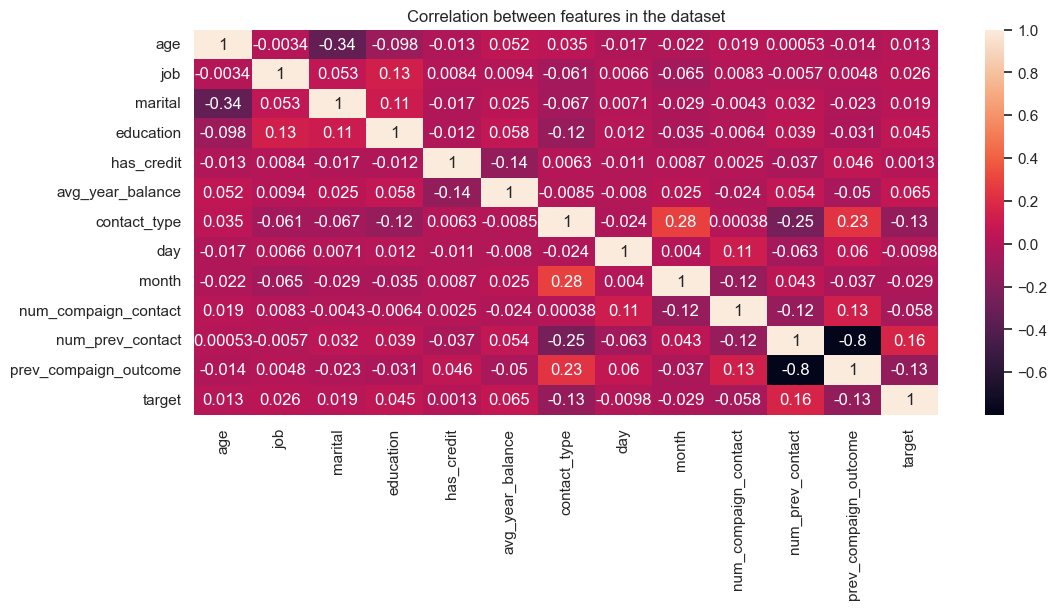

In [28]:
# show correlation between the 
plt.figure(figsize=(12, 5))
sns.heatmap( df.corr(method='kendall'), annot=True)
plt.title("Correlation between features in the dataset")
plt.show()

## Save to file

In [29]:
# Save new data to file.
df.to_csv("./bank/bank_training.csv", index=False, encoding="utf-8")